# **Exercise 3: Stochastic Gradient Learning in Neural Networks**

In [145]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random

sns.set()

# **Q1**

The stochastic gradient method is an iterative optimization algorithm that uses an estimate of the actual gradient based on a random subset of the data, which reduces the computational burden. Here, the goal is to minimize the risk function $R(w)$ such that:

$min_w R(w) ≡ min_w E_z[J(w,z)]=min_w∫(y-(^twx))^2dP(x)$

Therefore, the stochastic gradient descent algorithm is a suitable method to solve this optimization problem as it enables convergence to the optimal solution by following a descent direction in expectation. 

In this exercise, we suppose that we have indepedently drawn input-output samples $\{z_i=(x_i,y_i)\}_{i=1}^{n}$ to define the empirical risk function:

$min_w R(w) ≡ min_w \frac{1}{n}∑_{i=1}^{n}(y_i-(^twx_i))^2$

The stochastic gradient descent algorithm for minimizing the empirical risk comprises the following steps: 

- Start from an inital vector $w_0∈R^d$
- At each increment of k from 1 to $n_{iter}$:
  - Select a step size $ϵ_k>0$ and random index $i∈N$
  - Set $w_{k+1}=w_k-ϵ_k\nabla_w R(f(x_i,w),y_i)$

For the implementation of the algorithm, the gradient calculation gives: 

$\nabla_w R(f(x_i,w),y_i)=\nabla_w(y_i-(^twx_i))^2=-2x_i(y_i-(^twx_i))$

such that for $ϵ_k= \frac{1}{k_ᵅ}$ and $\frac{1}{2}<α<1$: 

$w_{k+1}=w_k + \frac{2}{k_ᵅ}x_i(y_i-(^twx_i))$




In [146]:
# Stochastic Gradient Descent (SGD) implementation 

def SGD ( x , y , w_0 , alpha , n_iter ):
  n = x.shape[0]
  N = y.shape[0]
  w_current = w_0

  for k in range(1,n_iter+1): 
    
    i = np.random.randint(N)
    xr = x[:,i].reshape((n,1))
    w_next = w_current + 2 * ((1/k)**alpha) * (y[i] - np.dot(w_current.T , xr)) * xr
    w_current = w_next

  return (w_next)

# **Q2**

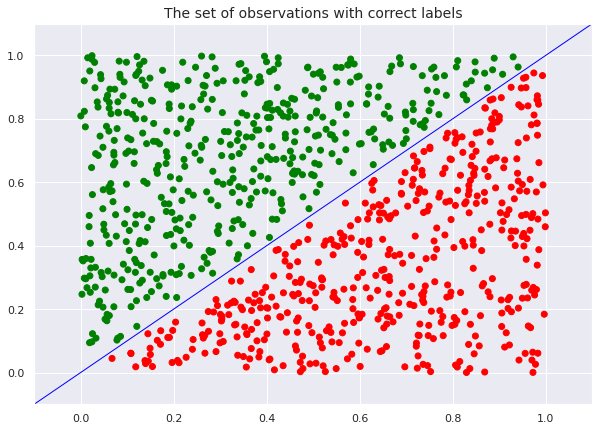

In [147]:
# Selecting parameters 

n=1000
a=1 
b=0 

# Calculate the normal vector of the hyperplane
w = np.array([[-1],[1]])
w = w / np.sqrt(np.dot(w.T ,w))

# Generate a collection of random points
x = [random.uniform(0,1) for i in range(n)] 
y = [random.uniform(0,1) for i in range(n)]
x1 = [] 
y1 = []

for i in range(n):
  if (y[i] - a * x[i] - b > 0.02) or (y[i] - a * x[i] - b < - 0.02) :
    x1.append(x[i]) 
    y1.append(y[i])

n = len(x1) 
x = x1
y = y1

X = np.array ([x,y])
Y = np.array([1 if y[i] - a * x[i] - b > 0 else -1 for i in range(n)])

# Plot the set of observations with their labels
plt.figure(figsize=(10,7))
labels = ['green' if y[i] - a * x[i] - b > 0 else 'red' for i in range(n) ] 
plt.scatter(x, y, c=labels)
plt.plot([-1, 2], [-1* a + b, 2 * a + b], c='blue', linewidth =1) 
plt.title("The set of observations with correct labels" , fontsize = 14) 
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))
plt.show()

# **Q3**

In [148]:
w_0 = np.random.rand(2,1)
alpha = 0.6 
n_iter=1000

# Calculate the estimated vector using SGD method
w_est = SGD (X, Y, w_0 , alpha , n_iter)
w_est = w_est / np.sqrt(np.dot(w_est.T , w_est)) 

print("The original vector is w is:", w)
print('The estimated vector w* is:', w_est)

The original vector is w is: [[-0.70710678]
 [ 0.70710678]]
The estimated vector w* is: [[-0.72003836]
 [ 0.69393426]]


In [149]:
# Distance between vectors
dist = np.linalg.norm(w-w_est)
print('The euclidean distance between the two vectors is', dist)

The euclidean distance between the two vectors is 0.018459177177127646


We can observe that the distance between original and estimated vectors, and therefore error, is small. Since the vectors are not far from each other, we can conclude that the Stochastic Gradient Descent is an efficient method that converges to the optimal solution. 

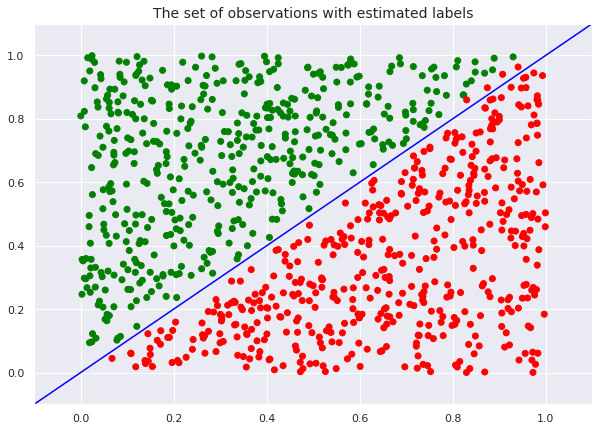

In [150]:
# Estimated labels
y_est = np.dot(w_est.T , X).T 

# Plot the estimated labels
plt.figure(figsize=(10,7))
labels_est = ['green' if y_est[i] > 0 else 'red' for i in range(n) ] 
plt.scatter(x,y, c=labels_est)

plt.plot([-1, 2], [-1* a + b, 2 * a + b], c='blue')
plt.title('The set of observations with estimated labels', fontsize = 14) 
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))
plt.show()

We can observe only a few errors in the labelled data set with a few  points placed on the wrong side of the hyperplane. These errors arise from observations located very close to the hyperplane, hence estimation is  globally accurate. 

# **Q4**

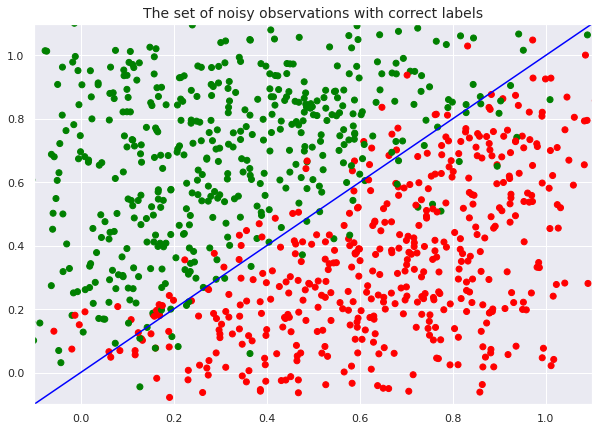

In [151]:
 # Additive Gaussian noise
noisy = np.array(np.random.normal(0,0.1,(2,n))) 
X_noisy = X + noisy

# Plot the noisy observations
plt.figure(figsize=(10,7))
plt.plot([-1, 2], [-1* a + b, 2 * a + b], c='blue')
plt.scatter(X_noisy[0,:], X_noisy[1,:], c=labels)
plt.title("The set of noisy observations with correct labels" , fontsize = 14) 
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))
plt.show()

In [152]:
 # Initialize random vector w0 and parameters
w_0 = np.random.rand(2,1)
alpha = 0.6 
n_iter = 1000

# Estimate vector using SGD method with noisy observations
w_est = SGD (X_noisy, Y, w_0 , alpha , n_iter)
w_est = w_est / np.sqrt(np.dot(w_est.T , w_est))
print('The estimated vector with noisy observations is:', w_est)
print('The euclidean distance between the two vectors is: ', np.linalg.norm(w-w_est))

The estimated vector with noisy observations is: [[-0.7220516 ]
 [ 0.69183921]]
The euclidean distance between the two vectors is:  0.02136460691315259


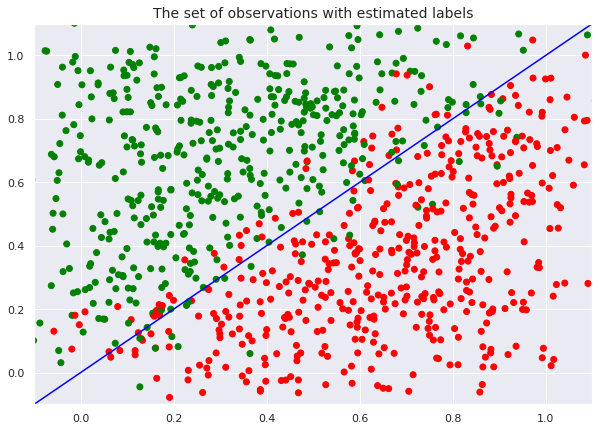

In [153]:
# Estimated labels
y_est = np.dot(w_est.T , X).T 

# Plot the estimated labels
plt.figure(figsize=(10,7))
labels_est = ['green' if y_est[i] > 0 else 'red' for i in range(n) ] 
plt.scatter(X_noisy[0,:],X_noisy[1,:], c=labels_est)
plt.plot([-1, 2], [-1* a + b, 2 * a + b], c='blue')
plt.title('The set of observations with estimated labels', fontsize = 14) 
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))
plt.show()

When comparing the set of observations with and without noise (Q3), we can clearly observe that adding noise has a negative impact on the efficiency of the algorithm. Indeed, it less accurate in the estimation of the labels of the observations.  

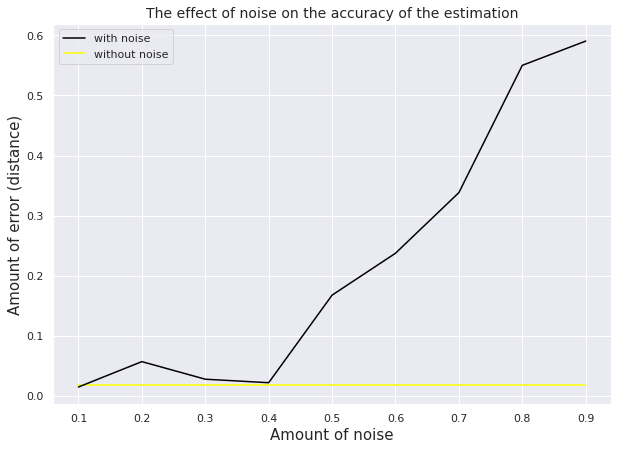

In [154]:
 # Here, we will plot the distance between the normal vector and the estimated vector as a function of noise
noise = np.arange(0.1,1,0.1) 
distn = []

for i in noise :
  eps = np.array(np.random.normal(0,i,(2,n))) 
  X_noisy = X + eps
  w_est = SGD (X_noisy, Y, w_0 , alpha , n_iter) 
  w_est = w_est / np.sqrt(np.dot(w_est.T , w_est))

  distn.append(np.linalg.norm(w-w_est))
  
plt.figure(figsize=(10,7))
plt.title("The effect of noise on the accuracy of the estimation" , fontsize = 14)
plt.xlabel('Amount of noise', fontsize=15)
plt.ylabel('Amount of error (distance)', fontsize=15)
plt.plot(noise, distn, color='black' ,label ='with noise' )
plt.hlines(y=dist, xmin=0.1, xmax=0.9, color='yellow', label='without noise') 
plt.legend()
plt.show()

Moreover, we can notice that for a small amount of noise, the difference in the accuracy of the estimation between observations with and without noise is not significantly difference. However, as the amount of noise increases above 0.5, the estimation error becomes too great compared with observations without noise, so results are here inaccurate. 

# **Q5**

In [155]:
 # Read the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/wdbc.data" ,index_col=False ,header = None)
x = data.iloc[:,2:]
y = (2 * (data.iloc[:,1]=='M').astype('int') -1 ).values

# Split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Normalize the data
scaler = Normalizer().fit(x_train) 
x_train= scaler.transform(x_train) 
x_test = scaler.transform(x_test)

x_train = x_train.T 
x_test = x_test.T

 # Initialize the parameters
n_parameters = x_train.shape[0]
w_0 = np.random.rand(n_parameters,1) 
alpha = 0.6
n_iter = 1000

# Estimate vector using SGD method
w_est = SGD (x_train, y_train, w_0 , alpha , n_iter) 
w_est = w_est / np.sqrt(np.dot(w_est.T , w_est))

#Predict test data
 y_pred = np.dot(w_est.T , x_test).reshape((y_test.shape[0],)) 
 y_pred = np.where(y_pred > 0,1,-1)

#Test accuracy
 print('The accuracy of the algorithm is around: ' , np.round(accuracy_score(y_test, y_pred)*100, 3),' %')

The accuracy of the algorithm is around:  73.099  %
